! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [4]:
import numpy as np
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd

In [6]:
from models import *

In [9]:
df = pd.read_csv('dane.data', sep='\t', names=[f'x{i}' for i in range(1, 7)]+['y'])
class MinMaxScaler:
    def __init__(self, A):
        self.shift = A.min(axis=0)
        self.factor = A.max(axis=0)-A.min(axis=0)

    def scale(self, A):
        return (A-self.shift)/self.factor

df_res = df.drop('y', axis=1)
scaler = MinMaxScaler(df_res)
df_res = scaler.scale(df_res)
df_res['y'] = df['y']
df_res
# df_res.to_csv('dane_skalowane.data', sep='\t', index=False)

,x1,x2,x3,x4,x5,x6,y
0,0.0,0.000000,0.0,0.052632,1.000000,0.421053,235.53
1,0.0,0.862069,0.0,0.315789,0.333333,0.315789,330.16
2,0.0,0.931034,0.0,0.526316,0.333333,0.473684,355.29
3,0.0,0.931034,0.0,0.842105,0.666667,1.000000,190.74
4,0.0,0.482759,0.0,0.947368,0.000000,0.210526,567.06
...,...,...,...,...,...,...,...
1994,1.0,0.068966,1.0,0.421053,0.222222,0.578947,506.64
1995,1.0,0.344828,1.0,0.684211,0.333333,0.263158,383.56
1996,1.0,0.137931,1.0,0.789474,0.333333,0.736842,520.09
1997,1.0,0.068966,1.0,0.842105,0.222222,0.000000,275.48


In [112]:
df = pd.read_csv('dane_skalowane.data', sep='\t', names=[f'x{i}' for i in range(1, 7)]+['y'])

# df['sin_x1'] = np.sin( 4*np.pi* df[f'x1'])
# df['sin_x6'] = np.sin( 4*np.pi* df[f'x6'])
# for i in range(1,7):
#     for j in [2,3,4,5,6,7,8,9]:
#         df[f'x{i}^{j}']=df[f'x{i}']**j
#     for j in range(i+1,7):
#         df[f'x{i}*{j}']=df[f'x{i}']*df[f'x{j}']

df['sin_x1'] = np.sin( 4*np.pi* df[f'x1'])
df['sin_x6'] = np.sin( 4*np.pi* df[f'x6'])
for i in range(1,7):
    for j in [2,3,8,9]:
        df[f'x{i}^{j}']=df[f'x{i}']**j

df

,x1,x2,x3,x4,x5,x6,y,sin_x1,sin_x6,x1^2,...,x4^8,x4^9,x5^2,x5^3,x5^8,x5^9,x6^2,x6^3,x6^8,x6^9
0,0.0,0.000000,0.0,0.052632,1.000000,0.421053,235.53,0.000000e+00,-8.371665e-01,0.0,...,5.888046e-11,3.098972e-12,1.000000,1.000000,1.000000,1.000000,0.177285,0.074646,0.000988,4.159369e-04
1,0.0,0.862069,0.0,0.315789,0.333333,0.315789,330.16,0.000000e+00,-7.357239e-01,0.0,...,9.889656e-05,3.123049e-05,0.111111,0.037037,0.000152,0.000051,0.099723,0.031491,0.000099,3.123049e-05
2,0.0,0.931034,0.0,0.526316,0.333333,0.473684,355.29,0.000000e+00,-3.246995e-01,0.0,...,5.888046e-03,3.098972e-03,0.111111,0.037037,0.000152,0.000051,0.224377,0.106284,0.002535,1.200605e-03
3,0.0,0.931034,0.0,0.842105,0.666667,1.000000,190.74,0.000000e+00,-4.898587e-16,0.0,...,2.528896e-01,2.129597e-01,0.444444,0.296296,0.039018,0.026012,1.000000,1.000000,1.000000,1.000000e+00
4,0.0,0.482759,0.0,0.947368,0.000000,0.210526,567.06,0.000000e+00,4.759474e-01,0.0,...,6.488603e-01,6.147098e-01,0.000000,0.000000,0.000000,0.000000,0.044321,0.009331,0.000004,8.123768e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1.0,0.068966,1.0,0.421053,0.222222,0.578947,506.64,-4.898587e-16,8.371665e-01,1.0,...,9.878502e-04,4.159369e-04,0.049383,0.010974,0.000006,0.000001,0.335180,0.194052,0.012622,7.307213e-03
1995,1.0,0.344828,1.0,0.684211,0.333333,0.263158,383.56,-4.898587e-16,-1.645946e-01,1.0,...,4.803060e-02,3.286304e-02,0.111111,0.037037,0.000152,0.000051,0.069252,0.018224,0.000023,6.052679e-06
1996,1.0,0.137931,1.0,0.789474,0.333333,0.736842,520.09,-4.898587e-16,1.645946e-01,1.0,...,1.509042e-01,1.191349e-01,0.111111,0.037037,0.000152,0.000051,0.542936,0.400058,0.086895,6.402800e-02
1997,1.0,0.068966,1.0,0.842105,0.222222,0.000000,275.48,-4.898587e-16,0.000000e+00,1.0,...,2.528896e-01,2.129597e-01,0.049383,0.010974,0.000006,0.000001,0.000000,0.000000,0.000000,0.000000e+00


<Axes: xlabel='x1', ylabel='y'>

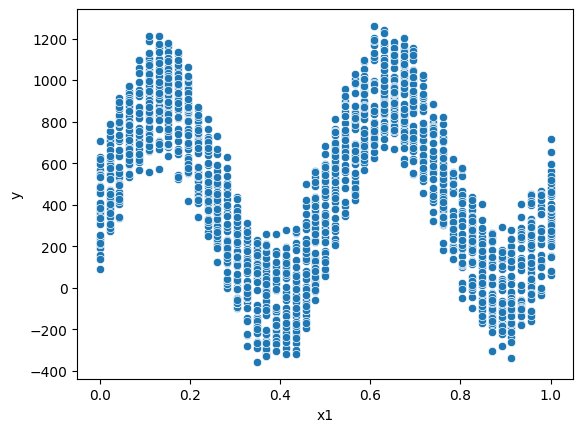

In [132]:
sns.scatterplot(df, x='x1', y='y')

<Axes: xlabel='sin_x1', ylabel='y'>

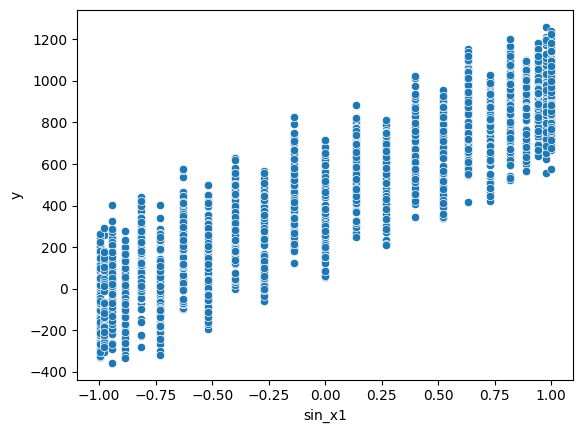

In [133]:
sns.scatterplot(df, x='sin_x1', y='y')

In [114]:
def partition(train, valid):
    assert train + valid <= 1
    
    df_train = df.sample(frac=train, random_state=1234)
    df_valid = df.drop(df_train.index).sample(frac=valid/(1-train), random_state=1234)
    df_test = df.drop(df_train.index).drop(df_valid.index)
    return df_train, df_valid, df_test

df_train, df_valid, df_test = partition(6/10, 2/10)
print("train: ", df_train.shape)
print("validate: ", df_valid.shape)
print("test: ", df_test.shape)

train:  (1199, 33)
validate:  (400, 33)
test:  (400, 33)


In [115]:
def get_data(df):
    y = df['y'].to_numpy()
    y = y.reshape([y.shape[0], 1])

    X = df.drop('y', axis=1)
    X.insert(0, 'x0', [1] * df.shape[0])
    X = X.to_numpy()
    
    return X, y

train_X, train_y = get_data(df_train)
valid_X, valid_y = get_data(df_valid)
test_X, test_y = get_data(df_test)
train_X.shape, train_y.shape

((1199, 33), (1199, 1))

In [116]:
def plot(model, thetas, X, y, step, label=''):
    epochs = [ep for ep in range(0, len(thetas), step)]

    train_losses = [model._mse(y, model.pred(X, theta), theta) for theta in thetas[::step]]
    train_data = {'epoch': epochs[2:], 'loss': train_losses[2:]}
    sns.lineplot(data=pd.DataFrame(train_data), x='epoch', y='loss', label=label)

In [79]:
train_X.shape

(1199, 57)

## Least Squares + No Regularization

In [117]:
%timeit
ls_model = LeastSquaresModel(train_X, train_y)
thetas, loss = ls_model.train(10000, step_size=0.2)
# print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])})')
print(f'loss:\t{loss}')
# print(train_X)

loss:	2362.250267377146


In [118]:
ls_model.analytical()
theta,loss = ls_model.analytical()
print(f'theta:\t{np.reshape(np.round(theta,2), theta.shape[0])}')
print(f'loss:\t{loss}')

theta:	[   296.53   1685.97     91.27     42.12   -355.83     20.37   1743.79
    449.38    149.04  -8213.59  10234.3  -19566.08  15867.99    -99.23
     92.92   -150.47    127.38   -235.41    301.39   -655.68    546.9
    483.42   -183.09    487.99   -408.55    -30.11   -121.96     68.1
    -42.69  -6721.45   7879.64 -15920.01  12937.3 ]
loss:	504.2780147572555


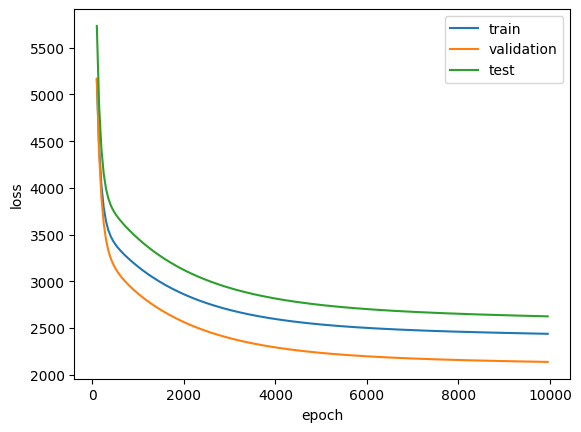

In [102]:
# print(np.sum((ls_model.pred(valid_X, thetas[-1])-valid_y)**2))
plot(ls_model, thetas, train_X, train_y, step=50, label='train')
plot(ls_model, thetas, valid_X, valid_y, step=50, label='validation')
plot(ls_model, thetas, test_X, test_y, step=50, label='test')

## Least Squares + Ridge Regularization

In [141]:
rls_model = RidgeLSModel(train_X, train_y, 0.0000001)
thetas, loss = rls_model.train(10000, step_size=0.2)
print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])}\nloss:\t{loss}')

theta:	[ 402.39 -175.73   65.39   11.96 -262.03   36.73  302.18  490.75  185.35
  110.47  454.06 -207.16 -307.05    1.37   -1.17    1.13   -4.48  -16.27
   10.22    0.7    -3.27  121.15  198.95   -5.51  -31.46  -95.41  -65.88
   10.47    4.65  -79.73  -14.05 -189.66 -172.66]
loss:	2362.360318010017


In [120]:
theta,loss = rls_model.analytical()
print(f'thetgia:\t{np.reshape(np.round(theta,2), theta.shape[0])}\nloss:\t{loss}')

thetgia:	[   296.53   1685.88     91.27     42.12   -355.83     20.37   1743.72
    449.39    149.04  -8213.1   10233.68 -19564.61  15866.74    -99.22
     92.91   -150.45    127.36   -235.4     301.39   -655.65    546.87
    483.4    -183.05    487.91   -408.49    -30.13   -121.96     68.12
    -42.7   -6721.07   7879.15 -15918.91  12936.38]
loss:	638.5376969104298


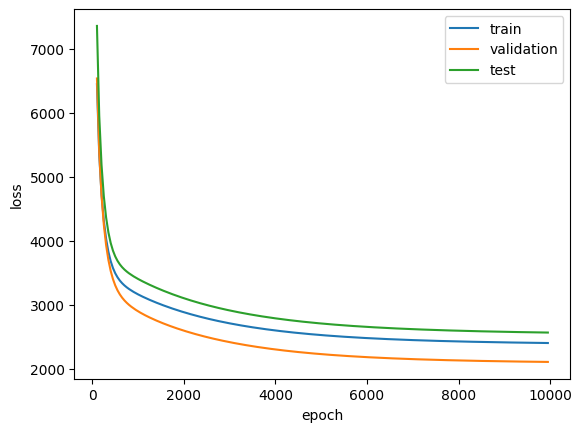

In [121]:
plot(rls_model, thetas, train_X, train_y, step=50, label='train')
plot(rls_model, thetas, valid_X, valid_y, step=50, label='validation')
plot(rls_model, thetas, test_X, test_y, step=50, label='test')

## Least Squares + Lasso Regularization

In [140]:
lls_model = LassoLSModel(train_X, train_y, 0.000001)
thetas, loss = lls_model.train(5000, step_size=0.2)
# print(f'theta: \t{np.reshape(np.round(thetas[-1],4), thetas[-1].shape[0])}')
print(f'loss:\t{loss}')

loss:	2402.025037226301


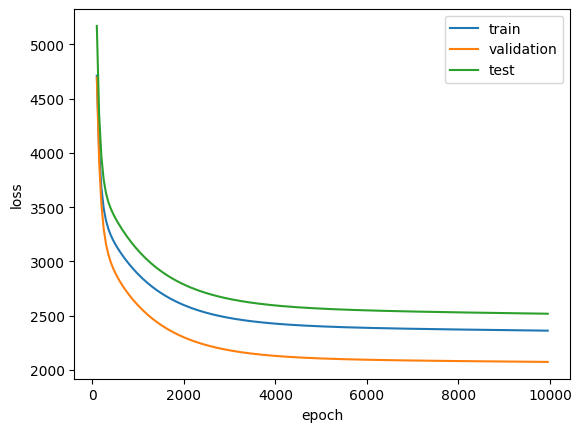

In [138]:
plot(lls_model, thetas, train_X, train_y, step=50, label='train')
plot(lls_model, thetas, valid_X, valid_y, step=50, label='validation')
plot(lls_model, thetas, test_X, test_y, step=50, label='test')

## Elastic Net

In [142]:
els_model = ElasticLSModel(train_X, train_y, 0.000001, 0.000001)
thetas, loss = els_model.train(10000, step_size=0.2)
print(f'loss:\t{loss}')

loss:	2363.2229816779163


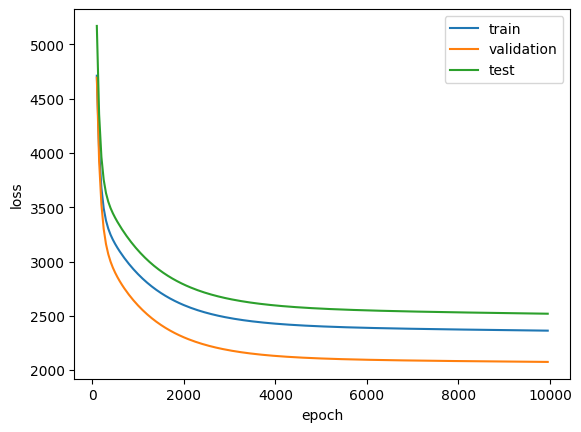

In [139]:
plot(els_model, thetas, train_X, train_y, step=50, label='train')
plot(els_model, thetas, valid_X, valid_y, step=50, label='validation')
plot(els_model, thetas, test_X, test_y, step=50, label='test')